In [1]:
import cv2
import numpy as np
import fingerprint_enhancer
import matplotlib.pyplot as plt

def detect_fingerprint(img_source_path, template_source_path, img_dest_path):
    img_id = cv2.imread(img_source_path, 0)
    img_id = cv2.resize(img_id, (2000, 1400))

    img_fingerprint = cv2.imread(template_source_path, 0)
    img_fingerprint = cv2.resize(img_fingerprint, (400, 600))

    w, h = img_fingerprint.shape[::-1]

    method = eval("cv2.TM_CCOEFF")
    # Apply template Matching
    res = cv2.matchTemplate(img_id,img_fingerprint, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    img_id_copy = img_id.copy()
    cv2.rectangle(img_id_copy, top_left, bottom_right, 255, 2)

    detected_fingerprint = img_id[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]

    cv2.imwrite(img_dest_path, detected_fingerprint)

    plt.figure(figsize=(15,15))
    plt.subplot(2, 3, 1)
    plt.imshow(res, cmap = 'gray')
    plt.title('Matching Result')

    plt.subplot(2, 3, 2)
    plt.imshow(img_id_copy, cmap = 'gray')
    plt.title('Detected Point')

    plt.subplot(2, 3, 3)
    plt.imshow(detected_fingerprint, cmap = 'gray')
    plt.title('Detected fingerprint')

    plt.show()
    
    
def process_fingerprint(img_source_path, img_dest_path, id=0):
    img = cv2.imread(img_source_path,0)
    img = cv2.resize(img, (400, 600))
    
    fig, axs = plt.subplots(1, 2, figsize=(15, 15))

    axs[0].imshow(img, cmap='gray')
    axs[0].set_title("Original fingerprint")
    
    if (not id):
        img = 255 - img
    
    th = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
                cv2.THRESH_BINARY,25,1)
    median = cv2.medianBlur(th,5)

    out = fingerprint_enhancer.enhance_Fingerprint(median)   # enhance the fingerprint image
    

    cv2.imwrite(img_dest_path, out)
    
    axs[1].imshow(out, cmap='gray')
    axs[1].set_title("Processed fingerprint")
    
    plt.show()
    


def match_fingerprint(user_img_path, target_img_path):

    user_img = cv2.imread(user_img_path,0)
    target_img = cv2.imread(target_img_path,0)
    
    # Initiate SIFT detector
    sift = cv2.SIFT_create()
    # find the keypoints and descriptors with SIFT
    kp1, des1 = sift.detectAndCompute(user_img,None)
    kp2, des2 = sift.detectAndCompute(target_img,None)
    # BFMatcher with default params
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1,des2,k=2)
    
    # Apply ratio test
    good = []
    for m,n in matches:
        if m.distance < 0.9*n.distance:
            
            (x1, y1) = kp1[n.queryIdx].pt
            (x2, y2) = kp2[m.trainIdx].pt
            
            if (np.abs(x1-x2) < 25) and (np.abs(y1-y2) < 25):
                
                good.append([m])
                
        
    img3 = cv2.drawMatchesKnn(user_img,kp1,target_img,kp2,good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.figure(figsize=(15,15))
    plt.imshow(img3)
    plt.show()
    
    print("Number of matched features: " + str(len(good)))
    if(len(good)>=15):
        print("Match")
    else:
        print("No match")
        
    print('-----------------------------')
        
    

# Detect and extract fingerprint

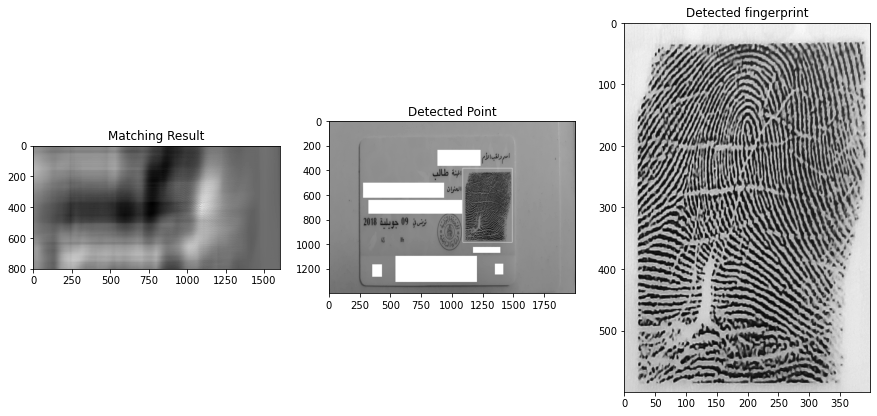

In [2]:
detect_fingerprint("./data/id/id1.jpg", "./data/id/fingerprint.jpg", "./data/target_fingerprint/original_target_fingerprint.jpg")


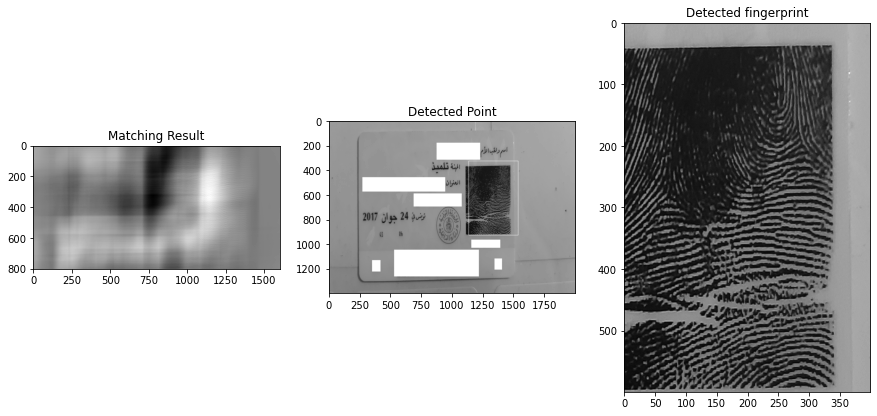

In [3]:
detect_fingerprint("./data/id/id2.jpg", "./data/id/fingerprint.jpg", "./data/target_fingerprint/original_target_fingerprint2.jpg")


# Matching fingerprints

## Process fingerprints

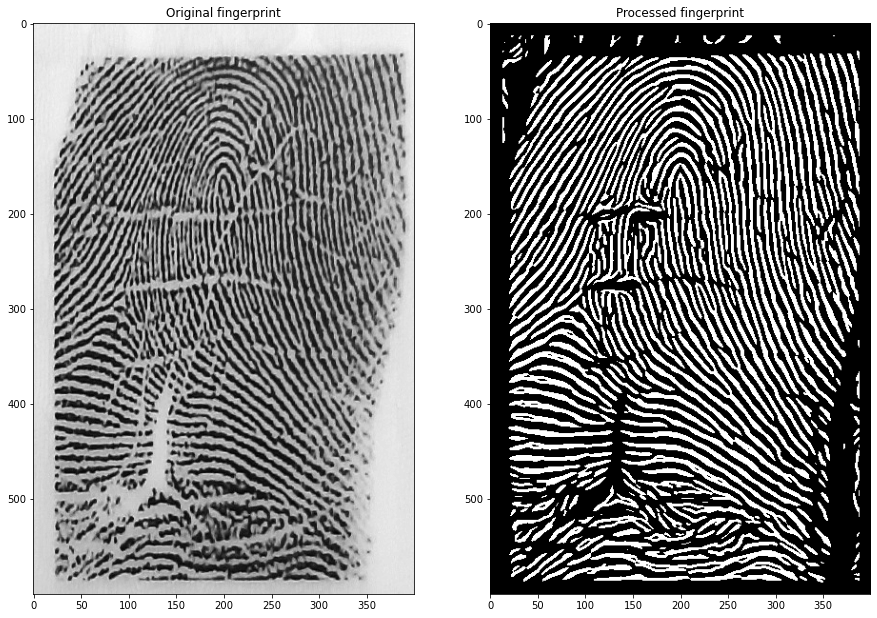

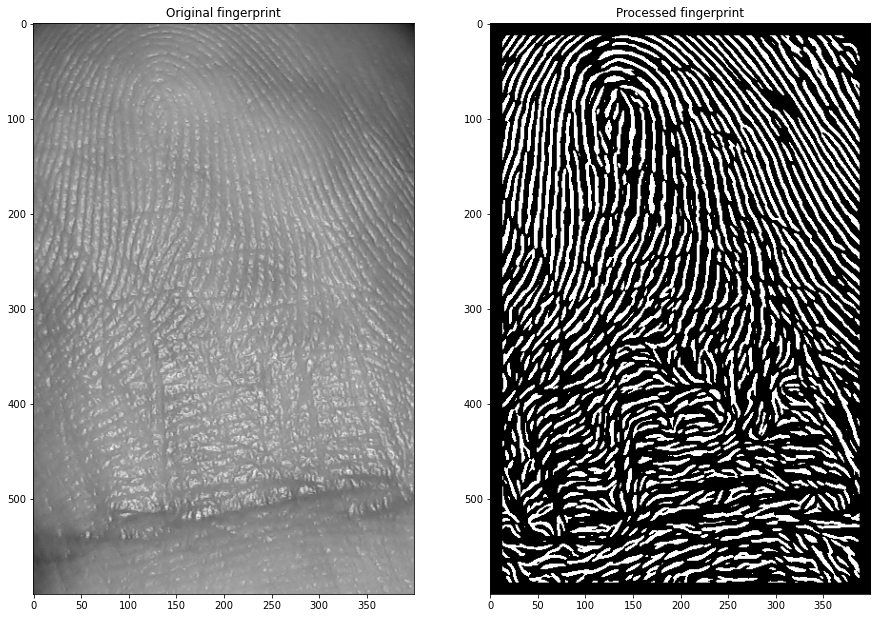

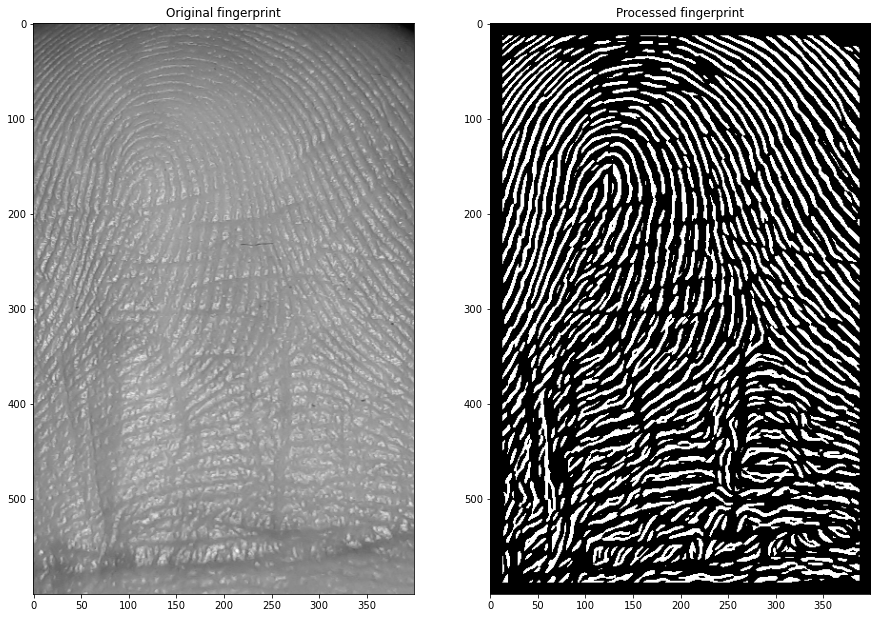

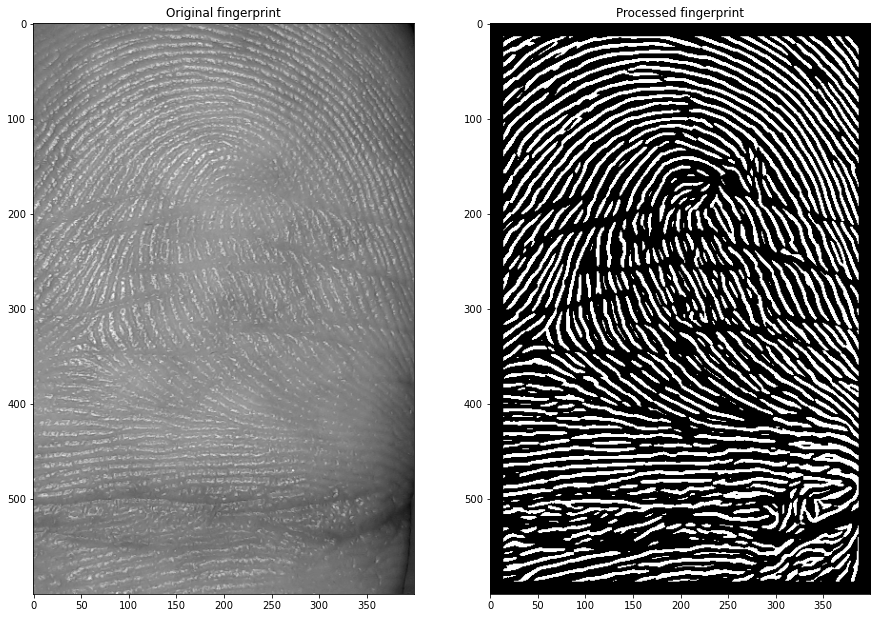

In [4]:
process_fingerprint("./data/target_fingerprint/original_target_fingerprint.jpg", "./data/target_fingerprint/processed_target_fingerprint.jpg", id=1)

process_fingerprint("./data/user_fingerprint/wrong_user_fingerprint1.jpg", "./data/user_fingerprint/processed_wrong_user_fingerprint1.jpg")
process_fingerprint("./data/user_fingerprint/wrong_user_fingerprint2.jpg", "./data/user_fingerprint/processed_wrong_user_fingerprint2.jpg")
process_fingerprint("./data/user_fingerprint/correct_user_fingerprint.jpg", "./data/user_fingerprint/processed_correct_user_fingerprint1.jpg")


## Matching

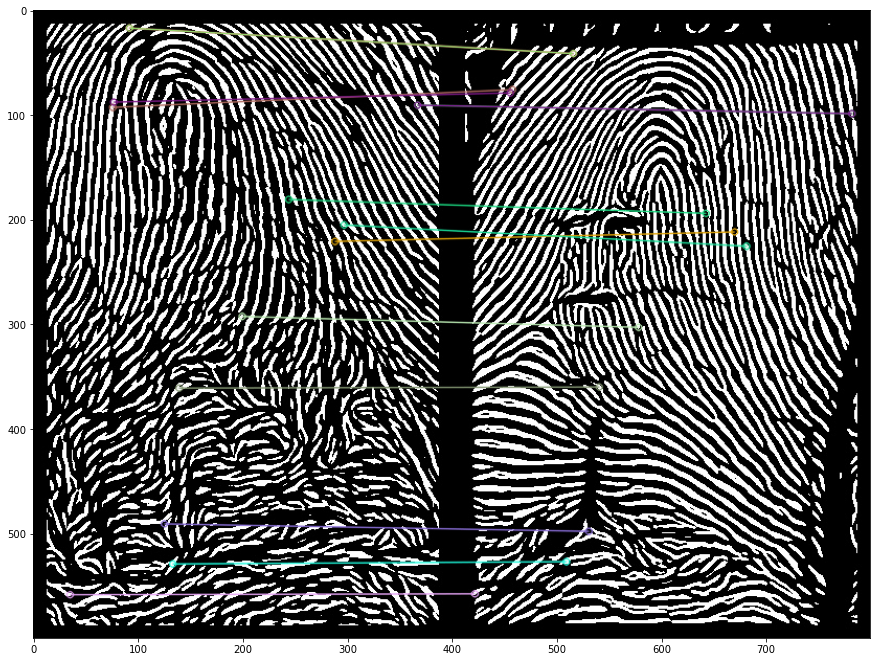

Number of matched features: 14
No match
-----------------------------


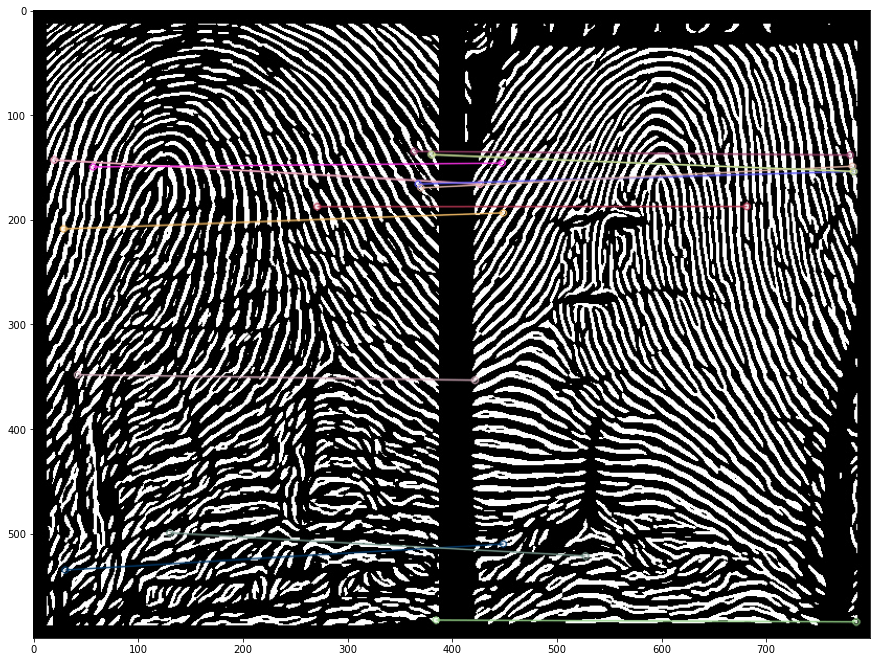

Number of matched features: 14
No match
-----------------------------


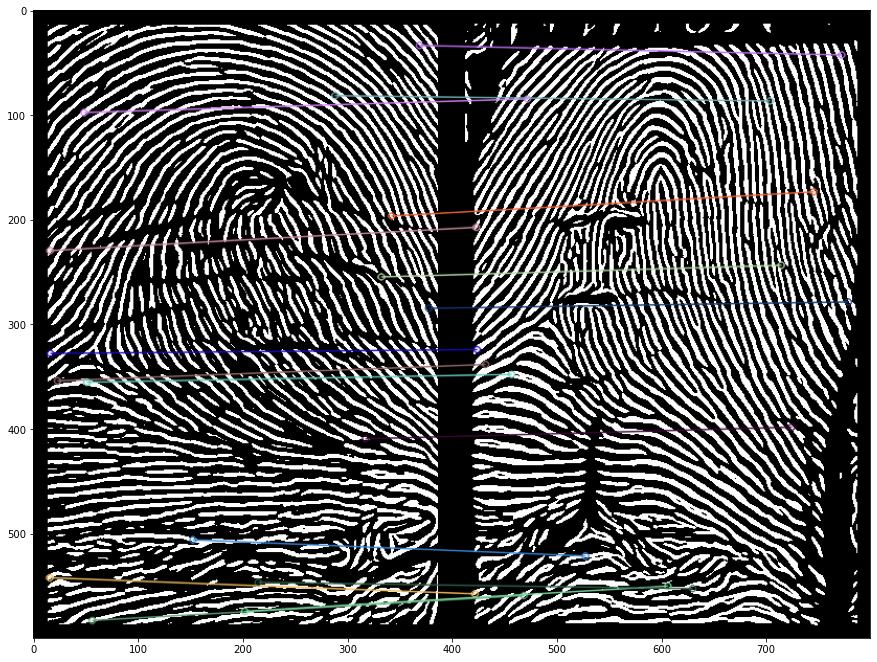

Number of matched features: 16
Match
-----------------------------


In [5]:
match_fingerprint("./data/user_fingerprint/processed_wrong_user_fingerprint1.jpg", 
                  "./data/target_fingerprint/processed_target_fingerprint.jpg")

match_fingerprint("./data/user_fingerprint/processed_wrong_user_fingerprint2.jpg", 
                  "./data/target_fingerprint/processed_target_fingerprint.jpg")

match_fingerprint("./data/user_fingerprint/processed_correct_user_fingerprint1.jpg", 
                  "./data/target_fingerprint/processed_target_fingerprint.jpg")